In [1]:
%load_ext autoreload

%autoreload 2

In [7]:
import glob
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import SNOM_Import


In [3]:
sys.path.append('/mnt/c/Users/conor/Git_Projects/PHD')

In [4]:
files = dict()

for file_path in tqdm(glob.glob("/mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant/*HEADR*")):

    file_name = file_path.split('/')[-1].split('HEADR')[0]
    files[file_name] = SNOM_Import.SNOM_File(file_path[:-14])


In [15]:
df = pd.DataFrame({name: vars(file) for name, file in files.items()}).T

In [ ]:
np

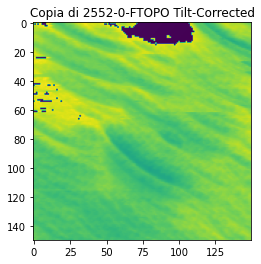

In [30]:
fig, ax1 = plt.subplots(ncols=1)

for i, row in df.iloc[-70:,:].iterrows():
    try:
        ax1.set_title(i+ 'FTOPO Tilt-Corrected')
        ax1.imshow(row.images['FTOPO']-plane_correct(row.images['FTOPO']))

        fig.savefig(os.path.join(os.getcwd(), 'Tilt_Corrected_Images' ,f"{i}-FTOPO Tilt-Corrected.png"), bbox_inches = 'tight')

    except: pass

In [25]:
def plane_correct(image):

    m = image.shape[0]

    X1, X2 = np.mgrid[:m, :m]

    X = np.hstack((np.reshape(X1, (m*m, 1)) , np.reshape(X2, (m*m, 1)) ) )
    X = np.hstack((np.ones((m*m, 1)) , X ))
    YY = np.reshape(image, (m*m, 1))

    theta = np.dot(np.dot( np.linalg.pinv(np.dot(X.transpose(), X)), X.transpose()), YY)

    plane = np.reshape(np.dot(X, theta), (m, m));
    Y_corr = image-plane

    return plane


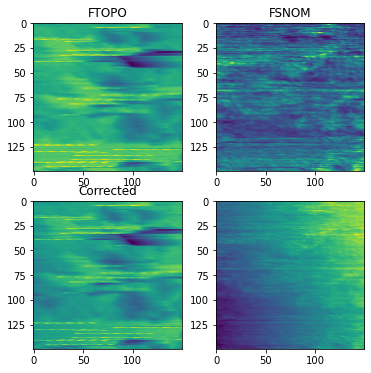

In [117]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(6,6))

im_file= files['2656-0-']

ftopo = im_file.images['FTOPO']
fsnom = im_file.images['FSNOM']

plane = plane_correct(ftopo)

ax1.imshow(ftopo);
ax1.set_title("FTOPO")
ax2.imshow(fsnom);
ax2.set_title('FSNOM')
ax3.imshow(ftopo - plane);
ax3.set_title('Corrected')
ax4.imshow(fsnom-plane)

In [55]:
vars(files['2677-0-'])

{'fileName': '/mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant/2677-0',
 'HEADR_RAW': 'Number of Files              4 \n\nStart time=   24/08/2020 15:05:44\nEnd time=     24/08/2020 15:23:21\n\nPre Scan=     Operator= Conor \nSample = C6 on Gold after piranha clean\nArea 1\n----------------------\n\nFibre = 608-569 6 um cleaved\n\nSNOM Mode = Reflection\nScan Rate = 50 ms\n----------------------\n\nAFM Gain = 8.0\nAmplitude = 0.054  V\nFrequency = 4.782 kHz\n\nVres = 0.020 V\nVref = 0.018 V\n-----------------------\n\nLaser Parameters\nWavenumber = 1689 cm-1\nPulse rate = 80 kHz\nPulse Width = 900 ns\n---------------------\n\nLock-in Settings\nTime constant = 10 ms\nSensitivity =  10 mV\n----------------------\n\nPost Scan=    \n\nSample Tissue=              \nSample Patient=             \nSample Slice=               \nSample Position=            0\n\nSNOM mode=                  0\n\nWavelength=                 0  \nFEL_Power=                  0 mW \n\nScan Size=                   500 \n

In [52]:
files['2677-0-'].FTOPO

AttributeError: 'SNOM_File' object has no attribute 'FTOPO'